
Resultados de las mediciones:
{'101': 971, '010': 4, '000': 7, '110': 7, '100': 15, '011': 9, '111': 5, '001': 6}


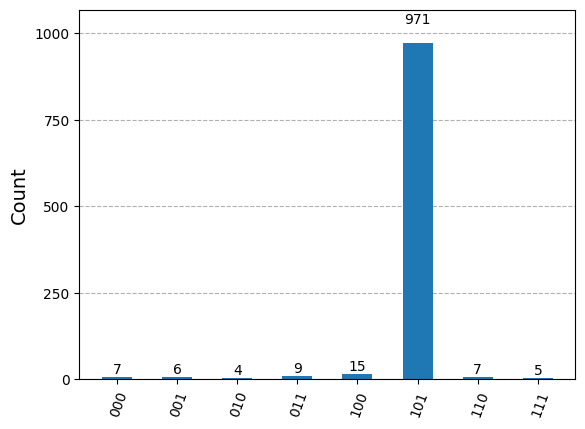

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import numpy as np

def grover_oracle(n, marked_state):
    """ Crea el oráculo de Grover que invierte la fase del estado marcado """
    oracle = QuantumCircuit(n)    
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            oracle.x(i)

    oracle.h(n-1)
    oracle.mcx(list(range(n-1)), n-1) 
    oracle.h(n-1)

    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            oracle.x(i)
    
    return oracle.to_gate(label="Grover Oracle")

def grover_diffusion(n):
    """ Implementa la difusión de Grover para amplificar el estado marcado """
    diffusion = QuantumCircuit(n)

    diffusion.h(range(n))
    diffusion.x(range(n))

    diffusion.h(n-1)
    diffusion.mcx(list(range(n-1)), n-1)
    diffusion.h(n-1)

    diffusion.x(range(n))
    diffusion.h(range(n))

    return diffusion.to_gate(label="Diffusion")

def grover_algorithm(n, marked_state, iterations=1):
    """ Implementa el algoritmo de Grover """
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    oracle = grover_oracle(n, marked_state)
    diffusion = grover_diffusion(n)

    for _ in range(iterations):
        qc.append(oracle, range(n))
        qc.append(diffusion, range(n))

    qc.measure(range(n), range(n))

    return qc

def run_grover(n, marked_state, shots=1024):
    """ Ejecuta el algoritmo de Grover y muestra los resultados """
    iterations = int(np.pi / 4 * np.sqrt(2**n))
    qc = grover_algorithm(n, marked_state, iterations)

    backend = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, backend)
    result = backend.run(transpiled_qc, shots=shots).result()
    counts = result.get_counts()
    return counts, qc

n = 3
marked_state = "101" 


counts, qc = run_grover(n, marked_state)
print("\nResultados de las mediciones:")
print(counts)

plot_histogram(counts)


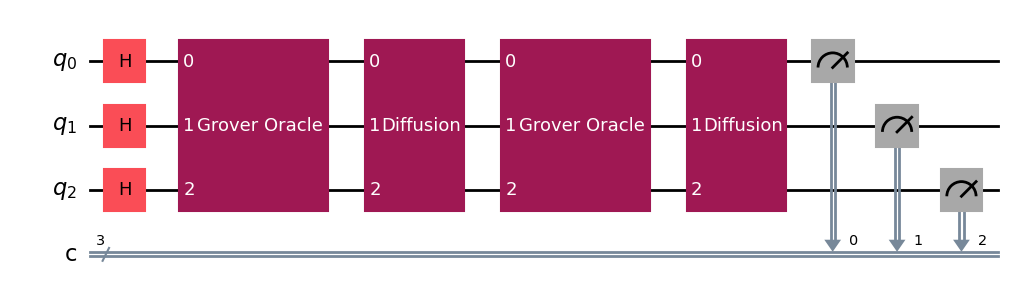

In [8]:
qc.draw("mpl")